In [1]:
from utils.trec_wrapper import parse_runs, average_of_dict

In [2]:
from glob import glob

In [3]:
files = glob("../outputs/bm25_tuning/*")

QREL_FILE = "../assets/qrels-clinical_trials.txt"

runs = parse_runs(list(files), qrels=QREL_FILE, metric="recall", depth=100)

In [4]:
import os

assert len(files) == len(runs)

rows = []

for _file, run in zip(files, runs):
    fn = os.path.split(_file)[-1]
    k, b = fn.replace('.txt', '').split('_')
    rows.append([float(k), float(b), average_of_dict(run.run, ignore_nans=True)])

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(rows, columns=['k', 'b', 'value']).pivot('k','b', 'value')
df = df.fillna(method='ffill')

df.max()

b
0.0    0.133082
0.1    0.133082
0.2    0.141953
0.3    0.146820
0.4    0.152879
0.5    0.160878
0.6    0.162416
0.7    0.163756
0.8    0.170012
0.9    0.175676
1.0    0.171946
dtype: float64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

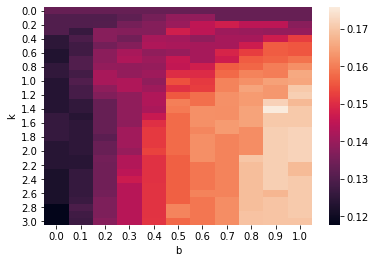

In [8]:
sns.heatmap(df)
plt.savefig('rnd5_recallbm25_tuning_expert.pdf', dpi=600)

In [9]:
for row in rows:
    if row[2] == float(df.max().max()):
        print(row)

[1.4, 0.9, 0.1756759589785105]
